In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/colab/Fake_news/Fake_train.csv')
data['label'] = preprocessing.LabelEncoder().fit_transform(data['label'])

X = data['text']
y = data['label']

test_text = pd.read_csv("/content/drive/MyDrive/colab/Fake_news/Fake_test_without_labels.csv")


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
##########################################            SVM         ###########################################
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


classifier = SVC(kernel='linear')
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracysvm = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

test_text_tfidf = vectorizer.transform(test_text['text'])

test_predictions = classifier.predict(test_text_tfidf)

for i, prediction in enumerate(test_predictions):
    label = "Fake" if prediction == 1 else "Original"
    print(f"Test {i+1}: {test_text['text'].iloc[i]} - Predicted: {label}")

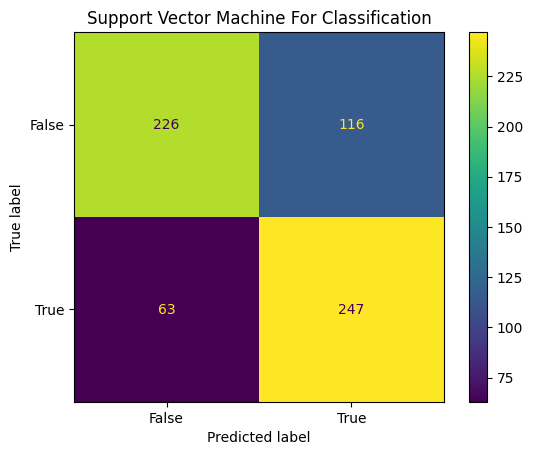

Accuracy: 0.7776073619631901
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.66      0.72       342
           1       0.68      0.80      0.73       310

    accuracy                           0.73       652
   macro avg       0.73      0.73      0.73       652
weighted avg       0.73      0.73      0.72       652

Confusion Matrix:
 [[226 116]
 [ 63 247]]


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title("Support Vector Machine For Classification")
plt.show()
print("Accuracy:", accuracysvm)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

In [ ]:
# Display and save the results to a CSV file
for i, prediction in enumerate(test_predictions):
    label = "Fake" if prediction == 1 else "Original"

results_df = pd.DataFrame({
    'Test Text': test_text['text'],
    'Predicted Label': ["Fake" if prediction == 1 else "Real" for prediction in test_predictions]
})

# Save the results to a CSV file
results_df.to_csv('/content/Beyond_Tech_Fake_News_SVMC', index=False)

print("\nResults saved to test_predictions_SVMC")



Results saved to test_predictions_SVMC


In [ ]:
##############################################    Navie bayes     #####################################
# Train the Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test_vectorized)

# Evaluate the performance of the model
accuracynb = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)

# Preprocess the test text and transform it using the same vectorizer
test_text_tfidf = vectorizer.transform(test_text['text'])

# Predict the labels for the test text
test_predictions = classifier.predict(test_text_tfidf)

for i, prediction in enumerate(test_predictions):
    label = "Fake" if prediction == 1 else "Original"
    print(f"Test {i+1}: {test_text['text'].iloc[i]} - Predicted: {label}")

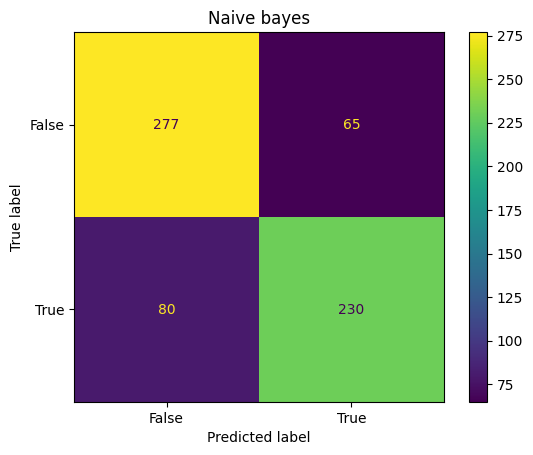

Accuracy: 0.7776073619631901
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79       342
           1       0.78      0.74      0.76       310

    accuracy                           0.78       652
   macro avg       0.78      0.78      0.78       652
weighted avg       0.78      0.78      0.78       652

Confusion Matrix:
 [[277  65]
 [ 80 230]]


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title("Naive bayes")
plt.show()
print("Accuracy:", accuracynb)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

In [ ]:
# Display and save the results to a CSV file
for i, prediction in enumerate(test_predictions):
    label = "Fake" if prediction == 1 else "Original"

results_df = pd.DataFrame({
    'Test Text': test_text['text'],
    'Predicted Label': ["Fake" if prediction == 1 else "Real" for prediction in test_predictions]
})
# Save the results to a CSV file
results_df.to_csv('/content/Beyond_Tech_Fake_News_NB', index=False)

print("\nResults saved to test_predictions_NB")



Results saved to test_predictions_NB


In [ ]:
########################################### RANDOM FOREST  #####################################################
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_tfidf, y_train)

# Predict labels on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracyrf = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Preprocess the test text and transform it using the same vectorizer
test_text_tfidf = vectorizer.transform(test_text['text'])

# Predict the labels for the test text
test_predictions = classifier.predict(test_text_tfidf)

for i, prediction in enumerate(test_predictions):
    label = "Fake" if prediction == 1 else "Originalinal"
    print(f"Test {i+1}: {test_text['text'].iloc[i]} - Predicted: {label}")


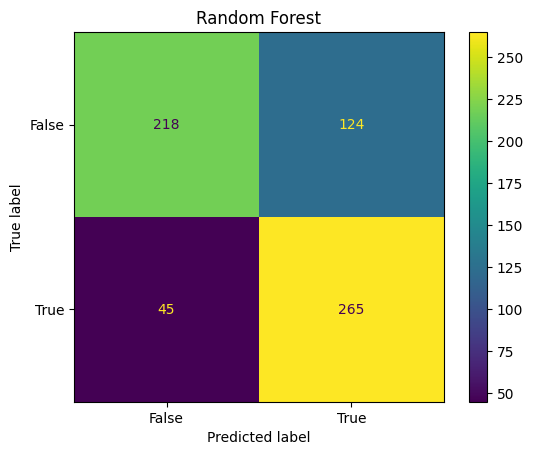

Accuracy: 0.74079754601227
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.64      0.72       342
           1       0.68      0.85      0.76       310

    accuracy                           0.74       652
   macro avg       0.76      0.75      0.74       652
weighted avg       0.76      0.74      0.74       652

Confusion Matrix:
 [[218 124]
 [ 45 265]]


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title("Random Forest")
plt.show()
print("Accuracy:", accuracyrf)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

In [ ]:
# Display and save the results to a CSV file
for i, prediction in enumerate(test_predictions):
    label = "Fake" if prediction == 1 else "Original"

results_df = pd.DataFrame({
    'Test Text': test_text['text'],
    'Predicted Label': ["Fake" if prediction == 1 else "Real" for prediction in test_predictions]
})
# Save the results to a CSV file
results_df.to_csv('/content/Beyond_Tech_Fake_News_RF', index=False)

print("\nResults saved to test_predictions_RF")



Results saved to test_predictions_RF


In [ ]:
################################################### Decision Tree    #########################################################
from sklearn.tree import DecisionTreeClassifier  # Change the import
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_tfidf, y_train)

# Predict labels on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracydt = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)


# Now, you can use this trained Decision Tree classifier to detect fake news on new data.

test_text = pd.read_csv("/content/drive/MyDrive/colab/Fake_news/Fake_test_without_labels.csv")

# Preprocess the test text and transform it using the same vectorizer
test_text_tfidf = vectorizer.transform(test_text['text'])

# Predict the labels for the test text
test_predictions = classifier.predict(test_text_tfidf)

for i, prediction in enumerate(test_predictions):
    label = "Fake" if prediction == 1 else "Original"
    print(f"Test {i+1}: {test_text['text'].iloc[i]} - Predicted: {label}")

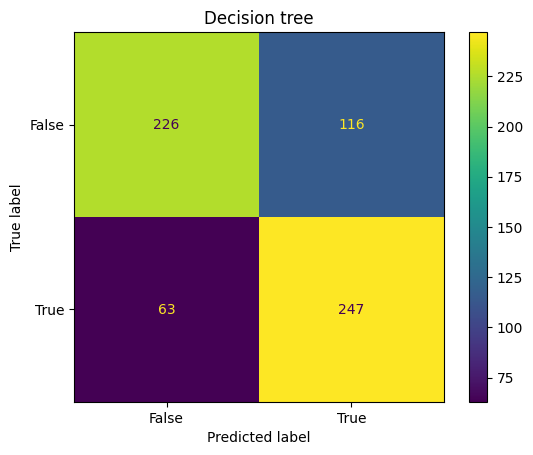

Accuracy: 0.7254601226993865
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.66      0.72       342
           1       0.68      0.80      0.73       310

    accuracy                           0.73       652
   macro avg       0.73      0.73      0.73       652
weighted avg       0.73      0.73      0.72       652

Confusion Matrix:
 [[226 116]
 [ 63 247]]


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title("Decision tree")
plt.show()
print("Accuracy:", accuracydt)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

In [ ]:
# Display and save the results to a CSV file
for i, prediction in enumerate(test_predictions):
    label = "Fake" if prediction == 1 else "Original"

results_df = pd.DataFrame({
    'Test Text': test_text['text'],
    'Predicted Label': ["Fake" if prediction == 1 else "Real" for prediction in test_predictions]
})

# Save the results to a CSV file
results_df.to_csv('/content/Beyond_Tech_Fake_News_DT', index=False)

print("\nResults saved to test_predictions_DT")



Results saved to test_predictions_DT


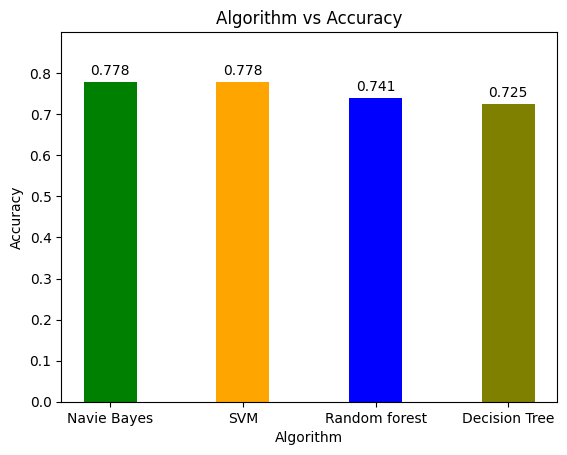

In [ ]:

import numpy as np
y= [accuracynb,accuracysvm,accuracyrf,accuracydt]
x=["Navie Bayes","SVM","Random forest","Decision Tree"]
c = ['green', 'orange', 'blue', 'olive']
fig, ax = plt.subplots()
bars = ax.bar(x, y, color=c, width=0.4)  # Adjust the bar width

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Algorithm vs Accuracy')

# Adjust the y-axis limits to increase the space for labels
plt.ylim(0, 0.9)  # Adjusted to provide space for labels

# Display the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

# Set y-axis ticks with three decimal places
plt.yticks(np.arange(0, max(y) + 0.1, 0.1))
plt.show()